<h1 id="tocheading">Tabla de Contenidos</h1>
<div id="toc"></div>

## Primeros pasos
Para empezar a analizar esta base de datos será necesario primero cargar el archivo y realizar los imports necesarios:

In [1]:
!pip install folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import folium
import json

df = pd.read_csv('./Datos/datos_negocios.csv',  sep=',', decimal='.')
df

,negocio_id,nombre,direccion,ciudad,estado,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192604,nqb4kWcOwp8bFxzfvaDpZQ,Sanderson Plumbing,NaN,North Las Vegas,NV,89032,36.213732,-115.177059,5.0,9,1,{'BusinessAcceptsCreditCards': 'True'},"Water Purification Services, Water Heater Inst...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
192605,vY2nLU5K20Pee-FdG0br1g,Chapters,17440 Yonge Street,Newmarket,ON,L3Y 6Y9,44.052658,-79.481850,4.5,3,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Books, Mags, Music & Video, Shopping",NaN
192606,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Contractors, Landscaping, Mason...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."
192607,zNMupayB2jEHVDOji8sxoQ,Beasley's Barber Shop,4406 E Main St,Mesa,AZ,85205,33.416137,-111.735743,4.5,15,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Barbers","{'Tuesday': '8:30-17:30', 'Wednesday': '8:30-1..."


## Negocios más grandes
A continuación se muestran los negocios ordenados por la cantidad de locales que poseen.

In [2]:
df1 = pd.DataFrame()
df1['repes'] = df['nombre'].value_counts()
df1['nombre'] = df1.index
df1

,repes,nombre
Starbucks,1066,Starbucks
McDonald's,806,McDonald's
Subway,768,Subway
Tim Hortons,333,Tim Hortons
Pizza Hut,320,Pizza Hut
...,...,...
Planète Mobile - Rogers Centre pour Petites Entreprises,1,Planète Mobile - Rogers Centre pour Petites En...
The Spice Outlet,1,The Spice Outlet
Kiku Japanese Cuisine,1,Kiku Japanese Cuisine
Hobaica Services Inc,1,Hobaica Services Inc


## Franquicias
Para posteriores análisis sería conveniente conocer qué negocios tienen más de un local abierto, ya que esta información puede ser útil para análisis más detallados.

In [3]:
franquicias = df1[df1['repes'] > 1]
franquicias

,repes,nombre
Starbucks,1066,Starbucks
McDonald's,806,McDonald's
Subway,768,Subway
Tim Hortons,333,Tim Hortons
Pizza Hut,320,Pizza Hut
...,...,...
Miko,2,Miko
HealthCare Partners,2,HealthCare Partners
TruForce Pest Control,2,TruForce Pest Control
Discovery Children's Museum,2,Discovery Children's Museum


## Negocios con su nota media
A continuación veremos los negocios con la media de su puntuación para poder ver cuáles son los mejores votados y aprovechar estos datos para analizar posteriormente otros aspectos. Comenzaremos hayando la puntuación media de las franquicias mejor valoradas.

In [4]:
aux = pd.DataFrame(df[['nombre','puntuacion']])
df2 = aux.groupby('nombre').mean()
dfmedias = franquicias.merge(df2, left_on='nombre', right_on='nombre')
dfmedias = dfmedias.sort_values(by='puntuacion', ascending=False)
dfmedias

,repes,nombre,puntuacion
5787,2,Abloom Salon,5.0
8122,2,Alpha Athletics: Crossfit 412,5.0
10886,2,Phoenix Bargain Storage,5.0
8093,2,Gotcha Covered,5.0
9390,2,Leons Auto Body,5.0
...,...,...,...
2676,4,Bell Canada,1.0
7640,2,Aetna,1.0
868,9,Centurylink,1.0
4732,2,Premier Spa Boutique,1.0


## Puntuación de franquicias con mayor número de locales abiertos
También se mostrará la valoración media de franquicias con el mayor número de locales abiertos:

In [5]:
dfmedias = dfmedias.sort_values(by='repes', ascending=False)
dfmedias

,repes,nombre,puntuacion
0,1066,Starbucks,3.257036
1,806,McDonald's,2.039082
2,768,Subway,2.673828
3,333,Tim Hortons,2.695195
4,320,Pizza Hut,2.173437
...,...,...,...
10737,2,Kaiser Garage Doors & Gates,3.750000
10738,2,Vanilla Pastry Studio,3.750000
10833,2,Amano,3.750000
7556,2,Smile Unique,3.750000


## Puntuación más alta de todos los negocios
Aquí se mostrarán los negocios con mayor puntuación, independientemente del número de locales que posea este negocio.

In [6]:
dfmediastotales = df1.merge(df2, left_on='nombre', right_on='nombre')
dfmediastotales = dfmediastotales.sort_values(by='puntuacion', ascending=False)
dfmediastotales

,repes,nombre,puntuacion
65311,1,The Palette,5.0
29495,1,Langtree Plantation,5.0
29485,1,Southern Nevada Locksmith,5.0
58110,1,ASAP Pro Service,5.0
107504,1,US Key Service,5.0
...,...,...,...
33853,1,HughesNet High Speed Internet Authorized Dealer,1.0
104714,1,Baymont by Wyndham Charlotte-Airport Coliseum,1.0
141792,1,United Automobile Insurance,1.0
16603,1,Karb King Karbs,1.0


## Negocios abiertos
Tanto los negocios más grandes (franquicias), como de todos los negocios en general. Como se puede observar existen unos 30.000 negocios cerrados en la base de datos.

In [7]:
dfabiertos = df[df['abierto'] == 1]
dfabiertos

,negocio_id,nombre,direccion,ciudad,estado,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
5,68dUKd8_8liJ7in4aWOSEA,The UPS Store,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd",Mississauga,ON,L5V 0B1,43.599475,-79.711584,2.5,3,1,"{'BusinessParking': ""{'garage': False, 'street...","Shipping Centers, Couriers & Delivery Services...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192603,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,39,1,"{'OutdoorSeating': 'True', 'BikeParking': 'Tru...","Restaurants, Italian","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ..."
192604,nqb4kWcOwp8bFxzfvaDpZQ,Sanderson Plumbing,NaN,North Las Vegas,NV,89032,36.213732,-115.177059,5.0,9,1,{'BusinessAcceptsCreditCards': 'True'},"Water Purification Services, Water Heater Inst...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
192605,vY2nLU5K20Pee-FdG0br1g,Chapters,17440 Yonge Street,Newmarket,ON,L3Y 6Y9,44.052658,-79.481850,4.5,3,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Books, Mags, Music & Video, Shopping",NaN
192606,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Contractors, Landscaping, Mason...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."


## Puntuación de franquicias abiertas
Aquí se muestran las puntuaciones más altas de franquicias abiertas.

In [8]:
aux2 = pd.DataFrame(dfabiertos[['nombre','puntuacion']])
df3 = aux2.groupby('nombre').mean()
dfmediasabiertos = franquicias.merge(df3, left_on='nombre', right_on='nombre')
dfmediasabiertos = dfmediasabiertos.sort_values(by='puntuacion', ascending=False)
dfmediasabiertos

,repes,nombre,puntuacion
8334,2,Echelon Autosports,5.0
4579,2,Simplicity Salon,5.0
9704,2,Eagle Taekwondo,5.0
4582,2,Madison Optometric Center,5.0
9697,2,Miykael Parrish Hair Care,5.0
...,...,...,...
9427,2,Urology Associates,1.0
5728,2,Wardley Property Management,1.0
7138,2,Absolute Auto Detailing,1.0
7392,2,Skinology Med Spa,1.0


## Puntuación de todos los negocios abiertos
Más en general que la anterior

In [9]:
dfmediastotalesabiertos = df1.merge(df3, left_on='nombre', right_on='nombre')
dfmediastotalesabiertos = dfmediastotalesabiertos.sort_values(by='puntuacion', ascending=False)
dfmediastotalesabiertos

,repes,nombre,puntuacion
59853,1,Tom Devlin's Monster Museum,5.0
20107,1,Aroma's Cafe,5.0
95210,1,Hello Browz,5.0
72817,1,Beauty by Lauren Reid,5.0
20119,1,Chiropractic Family Care Centre,5.0
...,...,...,...
62375,1,Cameron Apartments,1.0
29654,1,C & C Market Research,1.0
62389,1,Golden Retriever Since Babies,1.0
50676,1,Pristine Green Landscaping,1.0


## Tipos de negocios
Aquí se mostrarán los tipos de negocios más comunes en nuestra base de datos (contaremos solo negocios abiertos).

In [10]:
lista = []
dfabiertos_notnull = dfabiertos[dfabiertos['categorias'].notnull()]##Para evitar errores
for i in dfabiertos_notnull.index:
    aux = dfabiertos_notnull['categorias'][i].split(',')
    for j in aux:
        lista.append(j.replace(' ',''))
categorias1 = pd.DataFrame()
categorias1['categoria'] = Counter(lista).keys() 
categorias1['repes'] = Counter(lista).values() 
categorias1.sort_values(by='repes', ascending=False).head(15)

,categoria,repes
1,Restaurants,42237
13,Shopping,26734
4,Food,23208
15,HomeServices,18455
22,Beauty&Spas,16545
55,Health&Medical,15875
14,LocalServices,12830
60,Automotive,11955
42,Nightlife,9396
52,EventPlanning&Services,8960


Como se puede observar la mayor cantidad de negocios son restaurantes, seguido de lugares de compras con una diferencia de casi 20.000 negocios. Al parecer los negocios que más se valoran son los negocios de restaurantes y comidas.

## Locales en cada ciudad

In [11]:
locales_por_ciudad = pd.DataFrame()
locales_por_ciudad['repes'] = df['ciudad'].value_counts()
locales_por_ciudad['nombre'] = locales_por_ciudad.index
locales_por_ciudad.head(20)

,repes,nombre
Las Vegas,29370,Las Vegas
Toronto,18906,Toronto
Phoenix,18766,Phoenix
Charlotte,9509,Charlotte
Scottsdale,8837,Scottsdale
Calgary,7736,Calgary
Pittsburgh,7017,Pittsburgh
Montréal,6449,Montréal
Mesa,6080,Mesa
Henderson,4892,Henderson


## Los más populares de Charlotte
Son los locales de Charlotte con más de 500 opiniones

In [12]:
dfCharlotte = df[df['ciudad'] == "Charlotte"]
dfCharlotte = dfCharlotte.drop(['ciudad', 'estado'], axis=1)
populares_charlotte = dfCharlotte[dfCharlotte['num_revisiones'] >= 500]
populares_charlotte.sort_values(by="puntuacion", ascending=False)

,negocio_id,nombre,direccion,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
149103,XgRljuEUyaHBKIpIz-PRAA,Bang Bang Burgers,"2001 E 7th St, Ste D",28204,35.212388,-80.817146,4.5,593,1,"{'WiFi': ""u'free'"", 'Alcohol': ""u'beer_and_win...","American (New), Burgers, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
148503,RVQE2Z2uky4c0-njFQO66g,Midwood Smokehouse,1401 Central Ave,28205,35.221024,-80.814854,4.5,1474,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Barbeque, Pizza, Restaurants, Smokehouse, Food...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
127042,sdYkVaTy7EJwUkO8Ie_qPg,Viva Chicken,1617 Elizabeth Ave,28204,35.213421,-80.826022,4.5,849,1,"{'NoiseLevel': ""u'average'"", 'Caters': 'True',...","Restaurants, Peruvian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
116052,DyOzNIeXUksPNLXYHnB-oQ,Sabor Latin Street Grill,415 Hawthorne Ln,28204,35.216213,-80.821690,4.5,765,1,"{'RestaurantsAttire': ""u'casual'"", 'NoiseLevel...","Latin American, Food, Restaurants, Street Vend...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
115008,hggVnGwA5042-ABxqeJX-A,Good Food on Montford,1701 Montford Dr,28209,35.170963,-80.848309,4.5,671,1,"{'NoiseLevel': ""u'average'"", 'GoodForDancing':...","Tapas/Small Plates, Cocktail Bars, American (N...","{'Monday': '17:30-22:0', 'Tuesday': '17:30-22:..."
64760,QvxBnMcBPP1z_NAIYCqqdA,Haberdish,3106 N Davidson St,28205,35.246501,-80.806128,4.5,630,1,"{'CoatCheck': 'False', 'HappyHour': 'False', '...","Restaurants, Cocktail Bars, Nightlife, Souther...","{'Tuesday': '17:0-23:0', 'Wednesday': '17:0-23..."
4405,d8lmIZIqmBC9oPM8y1dc7Q,Paco's Tacos & Tequila,"6401 Morrison Blvd, Ste 8A",28211,35.156298,-80.830796,4.0,611,1,"{'BusinessParking': ""{'garage': False, 'street...","Tex-Mex, Restaurants, Bars, Mexican, Tacos, Ni...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
64728,e9sB72njxz87r5TL6kG-Fw,Cowbell Burger & Whiskey Bar,"201 N Tryon St, Ste 1010",28202,35.228577,-80.842514,4.0,523,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Whiskey Bars, Bars, Restaurants, Burgers, Nigh...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
167356,01fuY2NNscttoTxOYbuZXw,Pinky's Westside Grill,1600 W Morehead St,28208,35.229128,-80.867464,4.0,991,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Salad, American (Traditional), Restaurants, Bu...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
154989,o5QDrg_kb4hgsWxV6cV_Uw,The Flying Biscuit Cafe - Charlotte,4241 Park Rd,28209,35.174229,-80.848142,4.0,574,1,"{'RestaurantsDelivery': 'True', 'GoodForKids':...","Southern, Restaurants, Soul Food, Breakfast & ...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-21:0', '..."


## Horarios de los locales de Charlotte
La forma en la que se representan los horarios en la siguiente:
'Día': número de horas abierto   (Para cada día de la semana)
Como se puede observar la mayoría de los negocios cierra los lunes, lo cuál es lógico teniendo en cuenta que son restaurantes y la mayoría de personas no saldría a comer fuera después de un fin de semana. También hay algunos negocios que no cierran ningún día de la semana y otros que no disponen de horario, por lo que aparece como que están abiertos 0 horas todos los días (aunque estos negocios sí que están abiertos no aparece en la base de datos).

In [13]:

for x in populares_charlotte.index:
    horario = json.loads(populares_charlotte['horas'][x].replace('\'', '"'))
    for i in horario:
        horario[i] = horario[i].split('-')
        for j in range(len( horario[i])):
            horario[i][j] =  horario[i][j].split(':')
        if int(horario[i][1][0]) < int(horario[i][0][0]):
            horario[i] = 24 - int(horario[i][0][0]) + int(horario[i][1][0])
        else:
            horario[i] = int(horario[i][1][0])-int(horario[i][0][0])
    print(x, horario)

4405 {'Monday': 0, 'Tuesday': 11, 'Wednesday': 11, 'Thursday': 11, 'Friday': 12, 'Saturday': 12, 'Sunday': 9}
6941 {'Monday': 0, 'Tuesday': 11, 'Wednesday': 11, 'Thursday': 11, 'Friday': 12, 'Saturday': 12, 'Sunday': 9}
9553 {'Monday': 0, 'Tuesday': 11, 'Wednesday': 11, 'Thursday': 11, 'Friday': 12, 'Saturday': 12, 'Sunday': 10}
11562 {'Monday': 6, 'Tuesday': 6, 'Wednesday': 6, 'Thursday': 6, 'Friday': 8, 'Saturday': 8}
18498 {'Monday': 15, 'Tuesday': 15, 'Wednesday': 15, 'Thursday': 15, 'Friday': 15, 'Saturday': 16, 'Sunday': 16}
21740 {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}
24223 {'Monday': 7, 'Tuesday': 7, 'Wednesday': 14, 'Thursday': 14, 'Friday': 14, 'Saturday': 14, 'Sunday': 13}
27491 {'Monday': 11, 'Tuesday': 11, 'Wednesday': 11, 'Thursday': 11, 'Friday': 12, 'Saturday': 12, 'Sunday': 11}
29116 {'Monday': 0, 'Tuesday': 10, 'Wednesday': 10, 'Thursday': 10, 'Friday': 13, 'Saturday': 14, 'Sunday': 13}
29764 {'Monday': 11, 

## Tipo de negocio de los más populares de Charlotte

In [14]:

lista = []
for i in populares_charlotte.index:
    aux = populares_charlotte['categorias'][i].split(',')
    for j in aux:
        lista.append(j.replace(' ',''))
categorias = pd.DataFrame()
categorias['categoria'] = Counter(lista).keys() 
categorias['repes'] = Counter(lista).values() 
categorias.sort_values(by='repes', ascending=False).head(15)

,categoria,repes
1,Restaurants,34
5,Nightlife,12
6,Breakfast&Brunch,12
14,Food,11
2,Bars,11
15,American(New),11
26,Southern,7
30,American(Traditional),6
24,Salad,5
40,CocktailBars,5


## Locales más populares de Charlotte en un mapa
Como se podrá observar la mayoría de estos negocios se encuentran en grupos, es decir que son las zonas más transitadas de la ciudad. Muchos de estos negocios están posicionados en sitios de interés como en la estación de tren, cerca de parques o en un centro comercial en las afueras. Aunque donde más concentración de negocios populares hay es en la 5a calle, que está situada entre dos estadios muy famosos, uno de Fútbol americano perteneciente a los Carolina Panthers de la NFL, y otro estadio perteneciente a los Charlotte Hornets de la NBA, propiedad de Michael Jordan, lo cual supone un gran atractivo de masas, y por ende más valoraciones en esa zona. Además se pueden ver los marcadores de distintos colores dependiendo de la puntuación obtenida. Rojo con negocios menores a 3,5 de puntuación, naranja para negocios de 3,5 y verde para negocios con mayor puntuación.

In [15]:

m = folium.Map(
    location=[35.208 , -80.831],
    zoom_start=12,
    tiles='CartoDB positron'
)
color = "white"
for i in populares_charlotte.index:
    if populares_charlotte['puntuacion'][i] < 3.5:
        color = "red"
    if populares_charlotte['puntuacion'][i] == 3.5 :
        color = "orange"
    if populares_charlotte['puntuacion'][i] >= 4:
        color = "green"
    folium.Marker([populares_charlotte['latitud'][i] , populares_charlotte['longitud'][i]],
                  popup=populares_charlotte['nombre'][i], 
                  tooltip=populares_charlotte['nombre'][i],
                  icon=folium.Icon(icon="circle",color=color)
                 ).add_to(m)

m

## Contraste Puntuación vs revisiones en Charlotte 

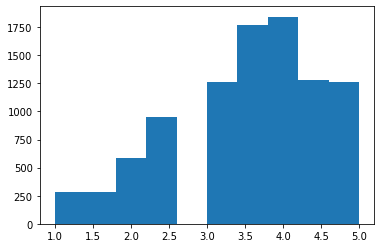

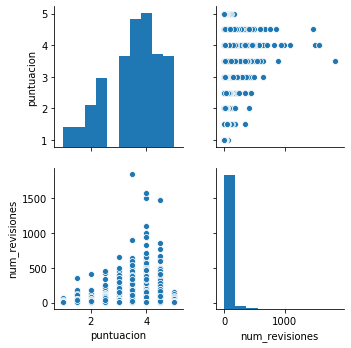

In [16]:
plt.hist(dfCharlotte['puntuacion'])
plt.show()
sns.pairplot(dfCharlotte, vars=["puntuacion", "num_revisiones"]);
plt.show()

## Información sobre los aeropuertos
Contiene los negocios relacionados con aeropuertos, ordenados por el número de revisiones que tienen. Como se puede observar, la mayoría tienen valoraciones de 3.5 o menos, lo cual es una media bastante baja, nuestra hipótesis es que las personas solo valoran negativamente los aeropuertos debido a los retrasos que se puedan producir o por los altos precios de los negocios en los aeropuertos aprovechándose de que la gente necesita comprar en estos sitios. Contamos además que el negocio mejor valorado es una guardería de animales situada en Phoenix con una puntuación de 4.

In [17]:
df.fillna("X")
aeropuertos = df[df['nombre'].str.contains("International Airport", na=False)]
aeropuertos.sort_values(by="num_revisiones", ascending=False)

,negocio_id,nombre,direccion,ciudad,estado,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
47512,FaHADZARwnY4yvlvpnsfGA,McCarran International Airport,5757 Wayne Newton Blvd,Las Vegas,NV,89119,36.085016,-115.151009,3.5,3627,1,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'fre...","Airlines, Airports, Transportation, Hotels & T...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
119082,JmI9nslLD7KZqRr__Bg6NQ,Phoenix Sky Harbor International Airport,3400 E Sky Harbor Blvd,Phoenix,AZ,85034,33.435472,-112.008803,3.5,2521,1,"{'WiFi': ""u'free'""}","Airports, Hotels & Travel","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
129315,yQab5dxZzgBLTEHCw9V7_w,Charlotte Douglas International Airport,5501 Josh Birmingham Pkwy,Charlotte,NC,28208,35.220559,-80.943874,3.5,1834,1,"{'WiFi': ""u'free'"", 'RestaurantsPriceRange2': ...","Hotels & Travel, Airports","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
36135,-kG0N8sBhBotMbu0KVSPaw,Toronto Pearson International Airport,3111 Convair Drive,Mississauga,ON,L5P 1B2,43.681032,-79.612427,3.0,862,1,"{'WiFi': ""u'free'"", 'RestaurantsPriceRange2': ...","Hotels & Travel, Airports","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
101324,4IGaWH9jUYMtP2uHIFEqFQ,Cleveland Hopkins International Airport - CLE,5300 Riverside Dr,Cleveland,OH,44135,41.410612,-81.838659,3.0,557,1,"{'WiFi': ""u'free'""}","Airports, Hotels & Travel","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
186239,u7CxxEzx8hvjoJ8onN4zTg,Pittsburgh International Airport,1000 Airport Blvd,Pittsburgh,PA,15231,40.495902,-80.241711,3.5,490,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Airports, Fast Food, Hotels & Travel","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
165277,KMjpXsJFNiqE18orsi4stQ,Calgary International Airport - YYC,2000 Airport Road NE,Calgary,AB,T2E 6Z8,51.125061,-114.016890,3.0,292,1,"{'WiFi': ""u'free'""}","Hotels & Travel, Airports","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
171327,d8QdPn1vD8C7n5RORyk9nA,Phoenix Sky Harbor International Airport - Ter...,4-7 E Sky Harbor Blvd,Phoenix,AZ,85034,33.435796,-111.997427,3.5,188,1,"{'WiFi': ""'free'""}","Airport Terminals, Hotels & Travel, Airports","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
143434,NSBiCz9CRowb6uwpC3vZrQ,Hyatt Regency Pittsburgh International Airport,1111 Airport Blvd,Pittsburgh,PA,15231,40.496836,-80.259831,3.0,98,1,"{'RestaurantsReservations': 'True', 'Restauran...","American (Traditional), Hotels & Travel, Hotel...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
8042,nKdONHkJYOQ7GiVP2u6O6Q,Embassy Suites by Hilton Pittsburgh Internatio...,550 Cherrington Pkwy,Coraopolis,PA,15108,40.494826,-80.204274,3.0,64,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Hotels, Event Planning & Services, Hotels & Tr...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


## Información de Toronto
Se harán las mismas tareas que con Charlotte pero con Toronto.
### Negocios

In [18]:
dfToronto = df[df['ciudad'] == "Toronto"]
dfToronto = dfToronto.drop(['ciudad', 'estado'], axis=1)
populares_toronto = dfToronto[dfToronto['num_revisiones'] >= 500]
populares_toronto.sort_values(by="puntuacion", ascending=False)

,negocio_id,nombre,direccion,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
111548,mZRKH9ngRY92bI_irrHq6w,Richmond Station,1 Richmond Street W,M5H 3W4,43.651373,-79.379285,4.5,645,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Canadian (New), Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3..."
45125,Yl2TN9c23ZGLUBSD9ks5Uw,Byblos,11 Duncan Street,M5V 3M2,43.647546,-79.388123,4.5,700,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Middle Eastern, Mediterranean","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
127052,r_BrIgzYcwo1NAuG9dLbpg,Pai Northern Thai Kitchen,18 Duncan Street,M5H 3G8,43.647866,-79.388642,4.5,2121,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Food, Thai, Ethnic Food, Specialt...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
114931,iGEvDk6hsizigmXhDKs2Vg,Seven Lives Tacos Y Mariscos,69 Kensington Avenue,M5T 2K2,43.654341,-79.400480,4.5,1152,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsDeliv...","Seafood, Restaurants, Mexican","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'..."
99903,N93EYZy9R0sdlEvubu94ig,Banh Mi Boys,392 Queen Street W,M5V 2A9,43.648827,-79.396970,4.5,1045,1,"{'NoiseLevel': ""u'average'"", 'Ambience': ""{'ro...","Sandwiches, Restaurants, Asian Fusion, Food, D...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
107476,0a2O150ytxrDjDzXNfRWkA,Miku,105-10 Bay Street,M5J 2R8,43.641235,-79.377370,4.0,604,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Sushi Bars, Restaurants, Japanese, Seafood","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
178425,RtUvSWO_UZ8V3Wpj0n077w,KINKA IZAKAYA ORIGINAL,398 Church St,M5B 2A2,43.660430,-79.378927,4.0,1397,1,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Restaurants, Japanese, Tapas/Small Plate...","{'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ..."
175512,uAAWlLdsoUf872F1FKiX1A,Bang Bang Ice Cream and Bakery,93a Ossington Avenue,M6J 2Z2,43.646286,-79.419474,4.0,894,1,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Ice Cream & Frozen Yogurt, Desserts, Food","{'Monday': '0:0-0:0', 'Tuesday': '15:0-22:0', ..."
171997,_xAJZOKBMPOe47p1MphB2w,Fishman Lobster Clubhouse Restaurant,4020 Finch Avenue E,M1S 3T6,43.801976,-79.295159,4.0,683,1,"{'BikeParking': 'False', 'HasTV': 'False', 'No...","Chinese, Restaurants, Live/Raw Food, Seafood","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
169460,DE89UdHFMCN6DtYWZuer5A,Hokkaido Ramen Santouka,91 Dundas Street E,M5B 2C8,43.656322,-79.377500,4.0,750,1,"{'RestaurantsAttire': ""u'casual'"", 'BusinessPa...","Japanese, Restaurants, Noodles, Ramen","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."


### Categorías
En este caso se puede ver que hay menos locales de noche, lo cuál puede significar que se sale menos debido al frío de la zona. Esta ciudad se encuentra mucho más al Norte que Charlotte, por lo que la temperatura será más baja generalmente.

In [19]:
lista = []
for i in populares_toronto.index:
    aux = populares_toronto['categorias'][i].split(',')
    for j in aux:
        lista.append(j.replace(' ',''))
categorias = pd.DataFrame()
categorias['categoria'] = Counter(lista).keys() 
categorias['repes'] = Counter(lista).values() 
categorias.sort_values(by='repes', ascending=False).head(15)

,categoria,repes
0,Restaurants,34
16,Food,8
11,Japanese,7
2,Bars,7
5,Nightlife,7
7,Canadian(New),7
6,American(New),5
13,Chinese,5
36,Seafood,4
15,Breakfast&Brunch,4


### Mapa
En este caso se puede observar cómo los negocios más populares se encuentran en la zona centro de la ciudada, lo cual resulta curioso ya que los estadios en este caso se encuentran localizados en la zona portuaria y no hay negocios próximos a ellos que sean populares, a excepción por supuesto de la CN Tower. En comparación con Charlotte se puede ver que los restaurantes son más diversos, hay restaurantes Chinos, Japoneses y otros negocios no tan americanos como era el caso de Charlotte.

In [20]:
m = folium.Map(
    location=[43.653908 , -79.384293],
    zoom_start=10,
    tiles='CartoDB positron'
)
color = "white"
for i in populares_toronto.index:
    if populares_toronto['puntuacion'][i] < 3.5:
        color = "red"
    if populares_toronto['puntuacion'][i] == 3.5 :
        color = "orange"
    if populares_toronto['puntuacion'][i] >= 4:
        color = "green"
    folium.Marker([populares_toronto['latitud'][i] , populares_toronto['longitud'][i]],
                  popup=populares_toronto['nombre'][i], 
                  tooltip=populares_toronto['nombre'][i],
                  icon=folium.Icon(icon="circle",color=color)
                 ).add_to(m)

m

### Mejores valorados con muchas revisiones
Además también se han explorado los negocios más populares de Toronto y se ha visto de que tipo son, aunque parece que sigue predominando los restaurantes.

In [21]:
mejores_toronto = dfToronto[dfToronto['puntuacion'] == 5]
mejores_toronto = dfToronto[dfToronto['num_revisiones'] > 400]
print(mejores_toronto.sort_values(by="puntuacion", ascending=False).shape)
lista = []
for i in mejores_toronto.index:
    aux = mejores_toronto['categorias'][i].split(',')
    for j in aux:
        lista.append(j.replace(' ',''))
categorias = pd.DataFrame()
categorias['categoria'] = Counter(lista).keys() 
categorias['repes'] = Counter(lista).values() 
categorias.sort_values(by='repes', ascending=False).head(15)

(77, 12)


,categoria,repes
1,Restaurants,72
12,Food,22
4,Bars,19
7,Nightlife,19
19,Japanese,14
30,Breakfast&Brunch,12
9,Canadian(New),12
8,American(New),9
28,Mexican,8
10,Desserts,7


### Mapa de calor
Se ha incluido un mapa de calor con los datos anteriormente obtenidos para que se pueda ver mejor la distribución de estos negocios.

In [22]:
from folium.plugins import HeatMap

m = folium.Map(
    location=[43.653908 , -79.384293],
    zoom_start=11,
    tiles='CartoDB positron'
)

pos = mejores_toronto[['latitud','longitud']].values.tolist()
HeatMap(pos, radius=50).add_to(m)
m

## Modelo predictor de si es viable abrir un negocio o no
Este modelo se basará en la ciudad en la que te encuentres para decir si es viable abrir un negocio o no. Para ello primero debemos generar las instancias. Consideraremos que un negocio es viable cuando su puntuación sea mayor de 4.

In [23]:
viabilidad = df
lista = []
for i in range (0,len(viabilidad['nombre'])):
    if (viabilidad['puntuacion'][i] >= 4):
        lista.append("Si")
    else:
        lista.append("No")
viabilidad['Es_viable'] = lista
viabilidad

,negocio_id,nombre,direccion,ciudad,estado,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas,Es_viable
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",NaN,No
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",No
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Si
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",Si
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192604,nqb4kWcOwp8bFxzfvaDpZQ,Sanderson Plumbing,NaN,North Las Vegas,NV,89032,36.213732,-115.177059,5.0,9,1,{'BusinessAcceptsCreditCards': 'True'},"Water Purification Services, Water Heater Inst...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Si
192605,vY2nLU5K20Pee-FdG0br1g,Chapters,17440 Yonge Street,Newmarket,ON,L3Y 6Y9,44.052658,-79.481850,4.5,3,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Books, Mags, Music & Video, Shopping",NaN,Si
192606,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Contractors, Landscaping, Mason...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ...",Si
192607,zNMupayB2jEHVDOji8sxoQ,Beasley's Barber Shop,4406 E Main St,Mesa,AZ,85205,33.416137,-111.735743,4.5,15,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Barbers","{'Tuesday': '8:30-17:30', 'Wednesday': '8:30-1...",Si


Una vez creadas las instancias podemos generar un modelo. El siguiente será el mejor que obtuvimos:

In [24]:
## Estas serán las instancias de entrenamiento
viabilidad = pd.DataFrame(viabilidad[['ciudad','Es_viable']])

## Aquí se generará el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = viabilidad.Es_viable
X = viabilidad.drop('Es_viable', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print ('R cuadrado (entrenamiento) = ', regressor.score(X_train, y_train))
y_pred = regressor.predict(X_test)
print ('-------------------------------')
print ('R cuadrado (test) = ', regressor.score(X_test, y_test))
print ('-------------------------------')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = viabilidad.Es_viable
X = viabilidad.drop('Es_viable', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)
print ('Precision media (entrenamiento) = ', modelo.score(X_train, y_train))
y_pred = modelo.predict(X_test)
print ('-------------------------------')
print ('Precision media (test) = ', modelo.score(X_test, y_test))
print ('-------------------------------')

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

y = viabilidad.Es_viable
X = viabilidad.drop('Es_viable', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

modelo = n()
modelo.fit(X_train, y_train)
print ('Precision media (entrenamiento)= ', modelo.score(X_train, y_train))
print ('-------------------------------')

y_pred = modelo.predict(X_test)
print ('Precision media (test) = ', modelo.score(X_test, y_test))
print ('-------------------------------')

ValueError: could not convert string to float: 'Champaign'

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')